In [8]:
%load_ext autoreload
%autoreload 2

import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from alphatools.pl import at_colors
from alphatools.pl.at_colors import show_rgba_color_list
from alphatools.pl.at_figure import AxisManager, create_figure, label, save_figure
from alphatools.pl.at_plots import Plots

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Basic colors, palettes and color maps for AlphaTools

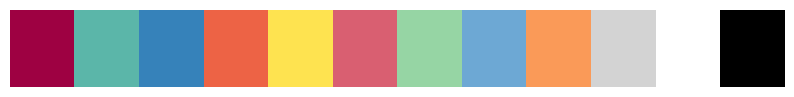

In [2]:
# colors, derived from the basic palette
colors = [
    "red",
    "green",
    "blue",
    "orange",
    "yellow",
    "lightred",
    "lightgreen",
    "lightblue",
    "lightorange",
    "grey",
    "white",
    "black",
]
show_rgba_color_list([at_colors.BaseColors.get(color) for color in colors])

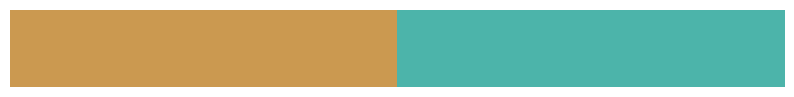

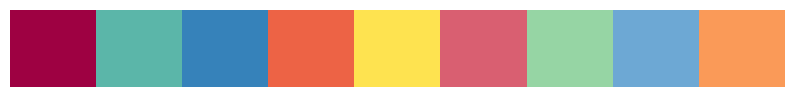

In [3]:
# color palettes
palettes = ["binary", "qualitative"]
for palette in palettes:
    show_rgba_color_list(at_colors.BasePalettes.get(palette))

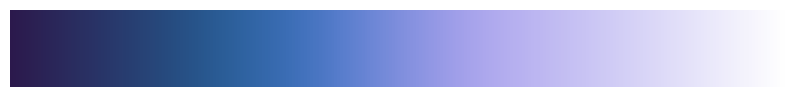

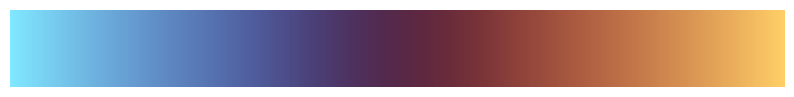

In [4]:
# colormaps
maps = ["sequential", "diverging"]
for cmap in maps:
    show_rgba_color_list(list(at_colors.BaseColormaps.get(cmap)(np.arange(0, 1, 0.001))))

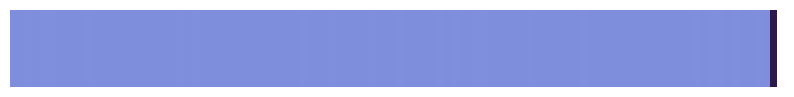

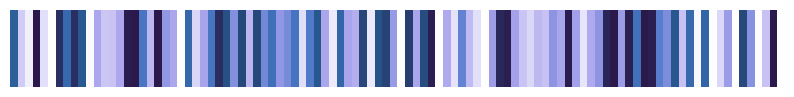

In [5]:
test_data = [*list(np.random.rand(100)), -100, 100]

# map colormaps to numerical values without capping
mapped_colors = at_colors.MappedColormaps("sequential").fit_transform(test_data)
show_rgba_color_list(mapped_colors)

# map colormaps to numerical values with capping
mapped_colors = at_colors.MappedColormaps("sequential", (5, 95)).fit_transform(test_data)
show_rgba_color_list(mapped_colors)

## Demonstrate at_figure.py submodule style & label handling

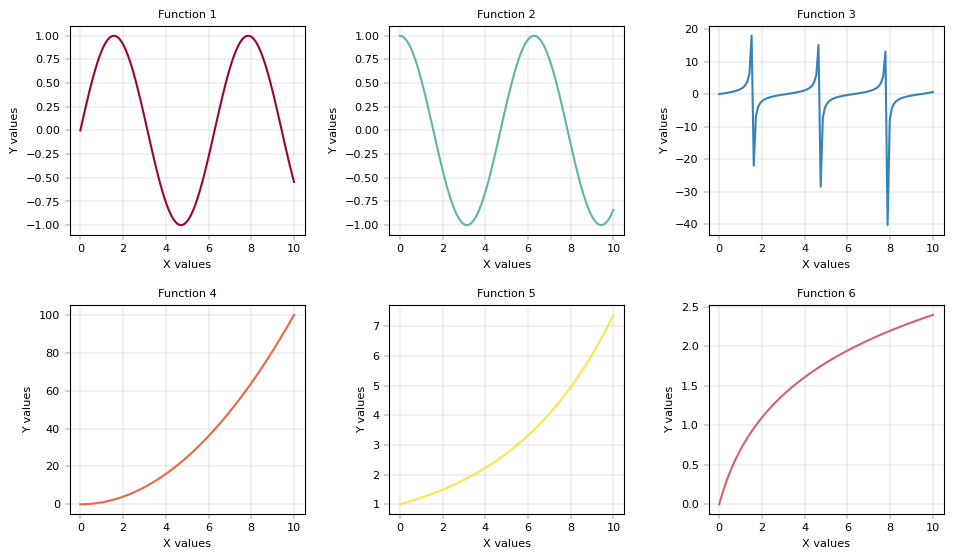

In [17]:
import numpy as np

# Create a 2x3 grid of subplots
fig, axs = create_figure(nrows=2, ncols=3, figsize=(10, 6), figure_padding=3)

# Apply the AxisManager to make axes iterable and apply consistent AlphaTools styling
axm = AxisManager(axs)

# Example dataset
x = np.linspace(0, 10, 100)
y_funcs = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.tan(x),
    lambda x: x**2,
    lambda x: np.exp(x / 5),
    lambda x: np.log(x + 1),
]

# Get qualitative palette
palette = at_colors.BasePalettes.get("qualitative", len(y_funcs))

# Iterate through all axes using next() and plot different functions
try:
    for i, func in enumerate(y_funcs):
        ax = axm.next()
        ax.plot(x, func(x), color=palette[i])
        label(ax, xlabel="X values", ylabel="Y values", title=f"Function {i + 1}")
except StopIteration:
    pass

plt.show()

# Save the figure
save_figure(
    fig=fig,
    filename="example_figure.png",
    output_dir="./example_outputs",
    dpi=300,
    transparent=False,
)

### Basic histogram

In [18]:
example_df = pd.DataFrame(
    {
        "values": np.concatenate([np.random.normal(i, size=200) + np.random.normal(i) for i in range(3)]),
        "levels": [i for i in range(3) for _ in range(200)],
    }
)

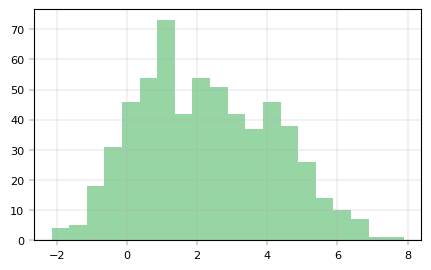

In [19]:
# with one color
fig, axs = create_figure(figsize=(5, 3))

# Apply the AxisManager
axs = AxisManager(axs).next()
Plots.histogram(
    data=example_df,
    value_column="values",
    bins=20,
    color="lightgreen",
    ax=axs,
)

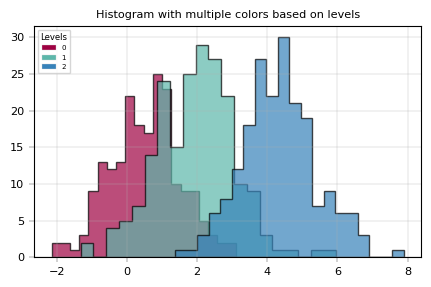

In [20]:
# with multiple colors based on levels
fig, ax = create_figure(figsize=(5, 3))

# Apply the AxisManager
ax = AxisManager(ax).next()
palette = at_colors.BasePalettes.get("qualitative", example_df["levels"].nunique())
Plots.histogram(
    data=example_df,
    value_column="values",
    color_column="levels",
    palette=palette,
    bins=20,
    color="blue",
    ax=ax,
    legend="auto",
    hist_kwargs={"alpha": 0.7, "histtype": "stepfilled", "edgecolor": "k"},
    legend_kwargs={"title": "Levels", "loc": "upper left"},
)
label(ax, title="Histogram with multiple colors based on levels")
plt.show()

# Save the figure
save_figure(
    fig=fig,
    filename="example_histogram.png",
    output_dir="./example_outputs",
    dpi=300,
    transparent=False,
)